# Exploratory data analysis
After you have collected a set of data, how do you do an exploratory data analysis? What techniques do you employ? What do the various techniques focus on? What conclusions can you expect to reach?

Some common questions that exploratory data analysis is used to answer are:
- What is a typical value?
- What is the uncertainty for a typical value?
- What is a good distributional fit for a set of numbers?
- What is a percentile?
- Does an engineering modification have an effect?
- Does a factor have an effect?
- What are the most important factors?
- Are measurements coming from different laboratories equivalent?
- What is the best function for relating a response variable to a set of factor variables?
- What are the best settings for factors?
- Can we separate signal from noise in time dependent data?
- Can we extract any structure from multivariate data?
- Does the data have outliers?

A critical early step in any analysis is to identify (for the engineering problem at hand) which of the above questions are relevant. That is, we need to identify which questions we want answered and which questions have no bearing on the problem at hand. After collecting such a set of questions, an equally important step, which is invaluable for maintaining focus, is to prioritize those questions in decreasing order of importance. EDA techniques are tied in with each of the questions. There are some EDA techniques (e.g., the scatter plot) that are broad-brushed and apply almost universally. On the other hand, there are a large number of EDA techniques that are specific and whose specificity is tied in with one of the above questions. Clearly if one chooses not to explicitly identify relevant questions, then one cannot take advantage of these question-specific EDA technqiues.

[Good tutorial](https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e)

[Source](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3.htm)

## California Housing

longitude	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	median_house_value


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
data = pd.read_csv("./sample_data/california_housing_train.csv")
print(data)

       longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
5        -114.58     33.63  ...         3.3438             74000.0
6        -114.58     33.61  ...         2.6768             82400.0
7        -114.59     34.83  ...         1.7083             48500.0
8        -114.59     33.61  ...         2.1782             58400.0
9        -114.60     34.83  ...         2.1908             48100.0
10       -114.60     33.62  ...         2.6797             86500.0
11       -114.60     33.60  ...         1.6250             62000.0
12       -114.61     34.84  ...         2.1571             48600.0
13       -114.61     34.83  ...         3.2120             704

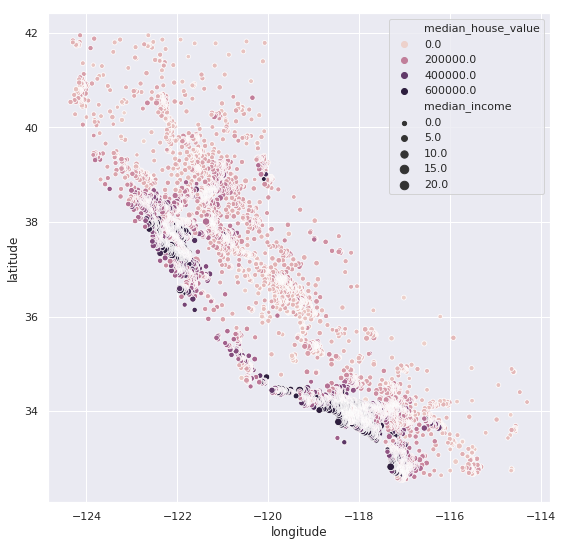

In [4]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y="latitude", size='median_income', hue='median_house_value', data=data)
plt.show()

<Figure size 648x648 with 0 Axes>

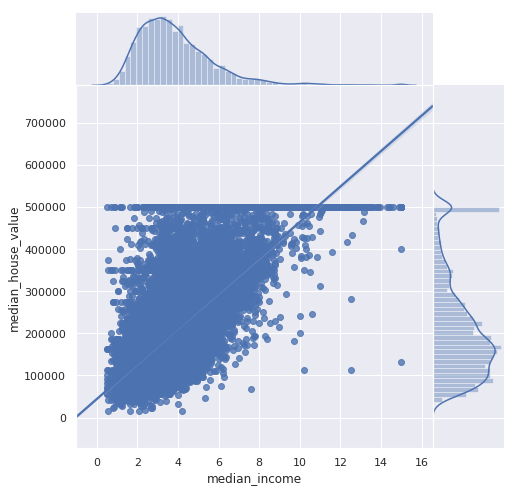

In [10]:
plt.figure(figsize=(9,9))
sns.jointplot(x='median_income', y='median_house_value', kind="reg", height=7, space=0,data=data,)
plt.show()

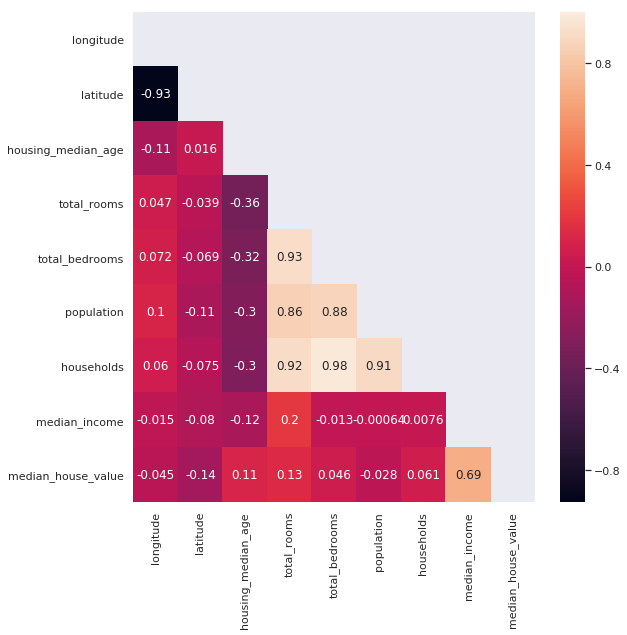

In [11]:
plt.figure(figsize=(9,9))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data.corr(),annot=True, mask=mask)
plt.show()

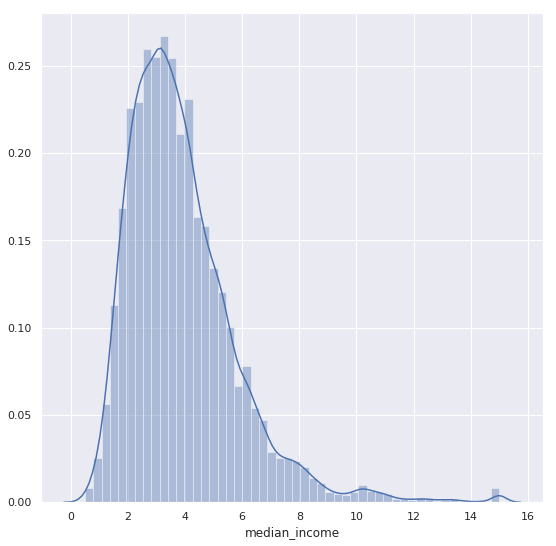

In [13]:
plt.figure(figsize=(9,9))
sns.distplot(data['median_income'])
plt.show()

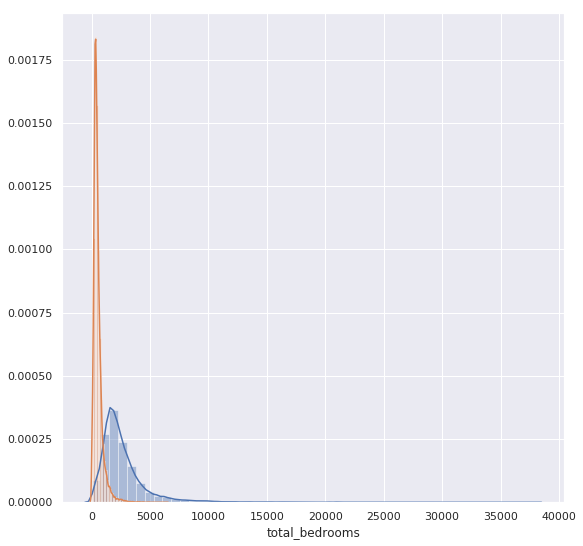

In [14]:
plt.figure(figsize=(9,9))
sns.distplot(data['total_rooms'])
sns.distplot(data['total_bedrooms'])
plt.show()

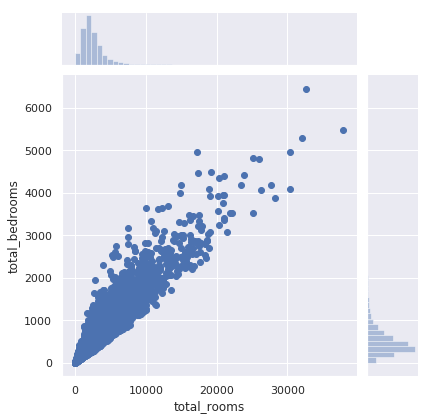

In [15]:
sns.jointplot(x="total_rooms", y="total_bedrooms", data=data);

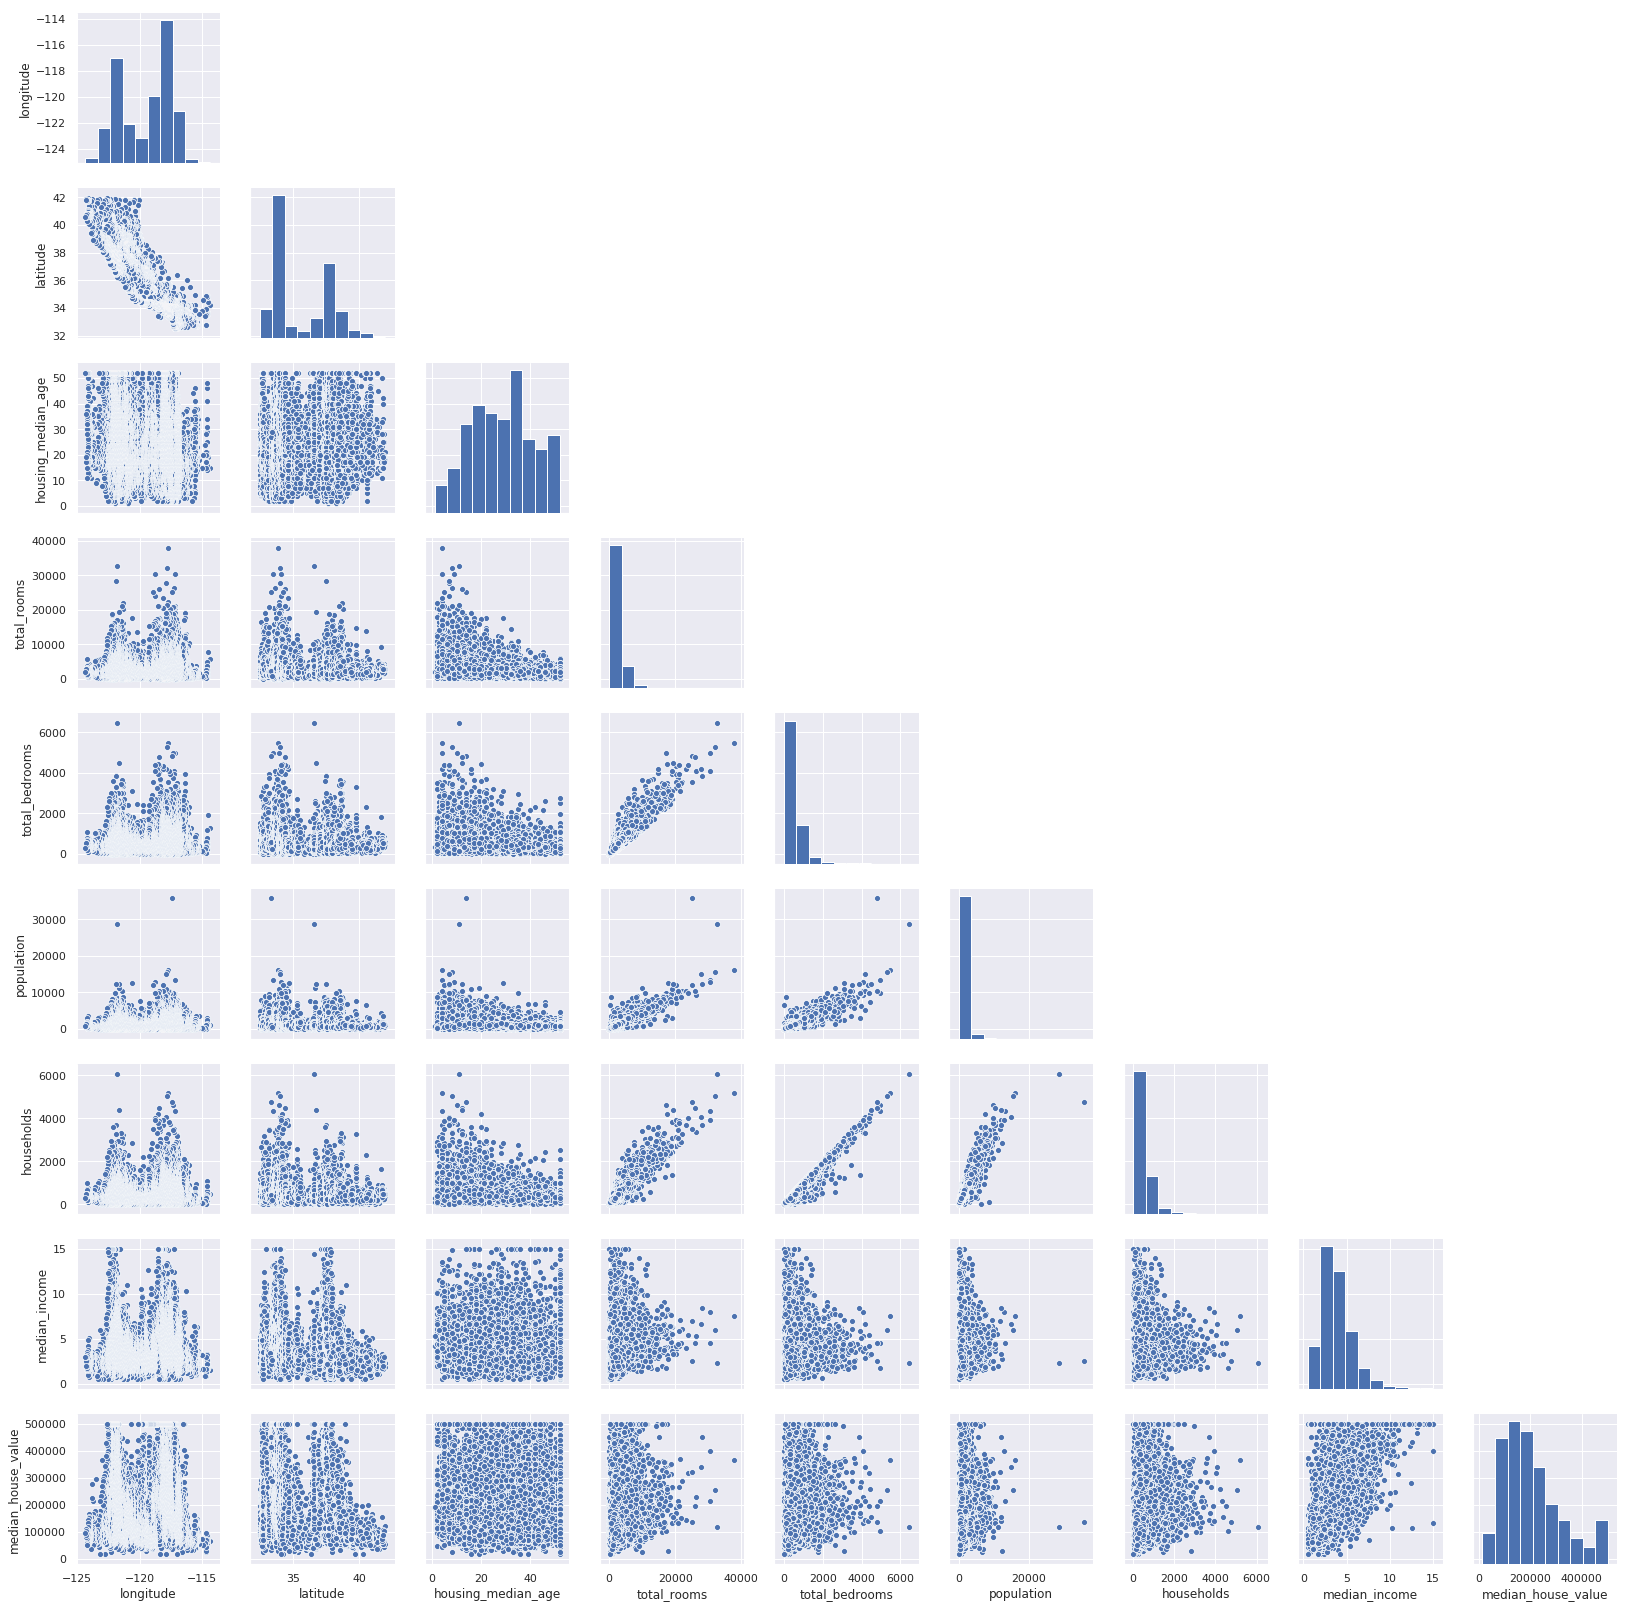

In [16]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
g=sns.pairplot(data)
g.map_upper(hide_current_axis)
plt.show(g)